In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hatches = ['+', 'x', 'o', '.', '*',"/"]

def plot(filename,title,ylim,ylabel):
    df=pd.read_csv(filename)
    df = df.sort_values(['group', 'name'],ascending = [True, True])
    # print(df.to_latex(index=False))
    # sns.set(rc={'figure.figsize':(6,2)})
    plt.figure(figsize=(6,3))
    plt.ylim(0,ylim)
    ax=sns.barplot(df, edgecolor="black",x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel",)
    # ax.set(xlabel ="", ylabel = ylabel, title =title,labelpad=15)
    ax.set_ylabel(ylabel,  labelpad=10)
    ax.set_xlabel("",  labelpad=105)

    for container in ax.containers:
        labels=ax.bar_label(container, rotation="vertical",padding=10)
        for label in labels:
            label.set_fontsize(8)
            label.set_color("gray")
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(0.5, -.35),
        ncol=3,
        title=None, frameon=False,
    )
    for i, container in enumerate(ax.containers):
        for patch in container.patches:
            patch.set_hatch(hatches[i % len(hatches)])
    plt.savefig(f"report/img/{title}.pdf", bbox_inches='tight')

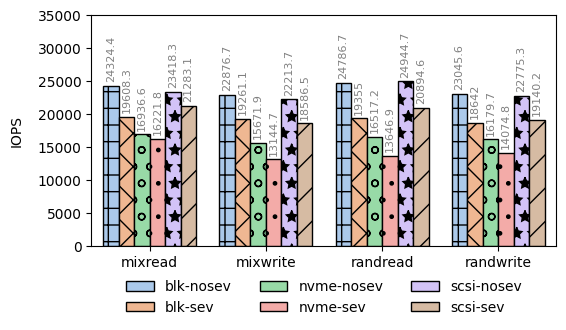

In [2]:
plot("benchmarks/iops_results.csv", title="iops", ylim=35000, ylabel="IOPS")

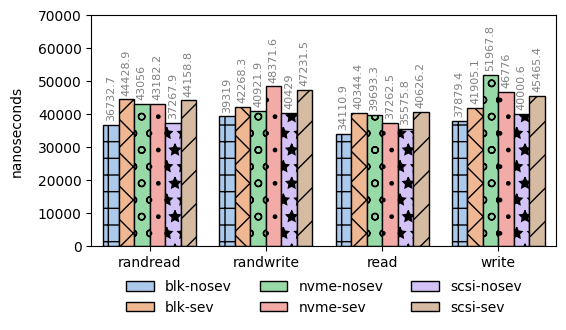

In [3]:
plot("benchmarks/al_results.csv",title='al',ylim=70000,ylabel="nanoseconds")

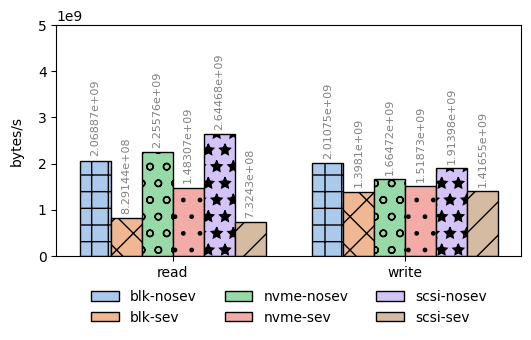

In [4]:
plot("benchmarks/bw_results.csv",title='bw',ylim=5000000000,ylabel="bytes/s")

In [5]:
def plot_ratios(filename):
    df=pd.read_csv(filename)
    print(df.to_latex())

In [21]:
plot_ratios("benchmarks/bw-ratios.csv")
plot_ratios("benchmarks/al-ratios.csv")
plot_ratios("benchmarks/iops-ratios.csv")

\begin{tabular}{lllrrr}
\toprule
 & group & name & nosev & sev & result \\
\midrule
0 & read & blk & 2068866712 & 829144265 & 0.400772 \\
1 & read & nvme & 2255760134 & 1483068817 & 0.657459 \\
2 & read & scsi & 2644684295 & 732429620 & 0.276944 \\
3 & write & blk & 2010752479 & 1398101333 & 0.695312 \\
4 & write & nvme & 1664716006 & 1518729595 & 0.912306 \\
5 & write & scsi & 1913978295 & 1416545941 & 0.740106 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllrrr}
\toprule
 & group & name & nosev & sev & result \\
\midrule
0 & randread & blk & 36732.676746 & 44428.919037 & 1.209520 \\
1 & randread & nvme & 43056.001194 & 43182.237293 & 1.002932 \\
2 & randread & scsi & 37267.866497 & 44158.765942 & 1.184902 \\
3 & randwrite & blk & 39318.967918 & 42268.305611 & 1.075011 \\
4 & randwrite & nvme & 40921.898750 & 48371.563309 & 1.182046 \\
5 & randwrite & scsi & 40428.971912 & 47231.466854 & 1.168258 \\
6 & read & blk & 34110.888638 & 40344.405910 & 1.182743 \\
7 & read & nvme & 39693.32

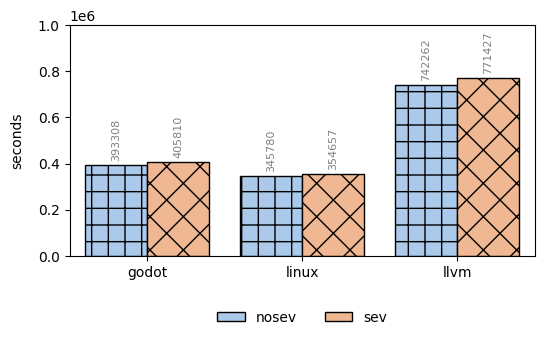

In [7]:
plot("benchmarks/compilation.csv", title="compilation-benchmark", ylim=1000000, ylabel="seconds")

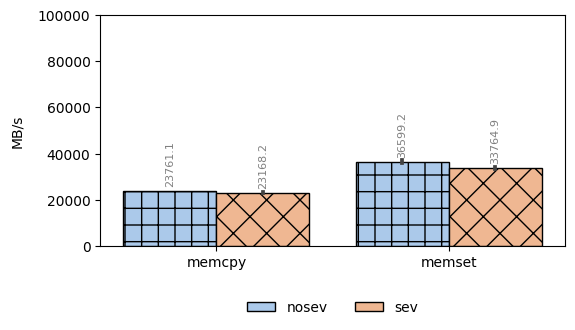

In [12]:
plot("benchmarks/tmb.csv", title="tinymembenchmark", ylim=100000, ylabel="MB/s")

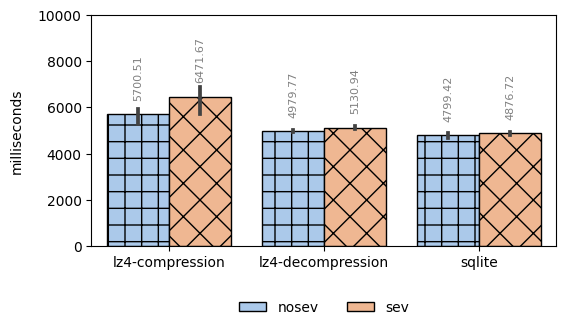

In [35]:
plot("benchmarks/misc.csv", title="misc", ylim=10000, ylabel="milliseconds")

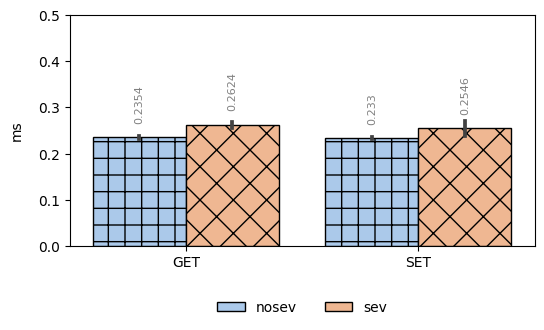

In [3]:
plot("benchmarks/redis.csv", title="redis-latency", ylim=0.5, ylabel="ms")